In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [2]:
import fastai
from fastai.text import *
from fastai.callbacks import *

In [3]:
df1=pd.read_csv('./r-india-Hot 04-13-2020.csv')
df2=pd.read_csv('./r-india-Top 04-13-2020.csv')
df=pd.concat([df1,df2])
df.shape

(1774, 14)

In [4]:
df.head(3)

,Title,Flair,Date Created,Upvotes,Upvote Ratio,ID,Edited?,Is Locked?,NSFW?,Is Spoiler?,Stickied?,URL,Comment Count,Text
0,Coronavirus (COVID-19) Megathread - News and U...,Coronavirus,03-29-2020 08:40:33,370,0.96,fqqdsg,04-11-2020 15:41:22,False,False,False,True,https://www.reddit.com/r/india/comments/fqqdsg...,9269,###[Covid-19 Fundraisers & Donation Links](htt...
1,"Announcing r/IndiaMeme, our own sub for memes ...",Announcement,04-12-2020 23:48:46,143,0.83,fzub9j,False,False,False,False,True,https://www.reddit.com/r/india/comments/fzub9j...,51,HELLO YOU NICE PEOPLE. WE GOT REALLY TIRED OF ...
2,My favorite lockdown pic so far!,Coronavirus,04-13-2020 06:11:59,3320,0.98,g000ic,False,False,False,False,False,https://i.redd.it/xq8w0na41fs41.jpg,88,NaN


In [5]:
df=df[['Flair','Title']]
df=df.groupby('Flair').filter(lambda x : len(x)>20)
df["Flair"].apply(lambda x:str(x))
df.dropna()
# df.head()

,Flair,Title
0,Coronavirus,Coronavirus (COVID-19) Megathread - News and U...
2,Coronavirus,My favorite lockdown pic so far!
3,Coronavirus,Covid-19: Kamal Nath says lockdown was delayed...
4,AskIndia,"Lost my Job, Sick Mother and Paralysed Dad, In..."
5,Coronavirus,"In Chhattisgarh, 108 Out of 159 “Tableeghis” T..."
...,...,...
982,Non-Political,[Serious] He flew to India and ghosted me. Fou...
983,Food,"Take a break, with the new Kit-Kat."
984,Food,I made paav bhaji with homemade dinner rolls.
985,Sports,"Bajrang Punia, who won a silver medal in last ..."


In [6]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(df)

In [18]:
data_lm = TextLMDataBunch.from_df('.', train,val,text_cols='Title',label_cols='Flair')
data_lm.save('./tmp/data_lm.pkl')

In [ ]:
data_lm= load_data('./tmp/data_lm.pkl')

In [19]:
# Classifier model data
data_clas  = TextClasDataBunch.from_df('.', train_df=train,
                                       text_cols='Title',label_cols='Flair',
                                       valid_df=val,
                                       vocab=data_lm.train_ds.vocab)
data_clas.save('./tmp/data_clas.pkl')

In [13]:
data_clas = load_data('./tmp/data_clas.pkl')

In [20]:
data_clas.show_batch()

text,target
xxbos xxmaj dutee xxmaj chand won the xxmaj gold xxmaj xxunk in xxmaj women 's 100 m xxunk at the 30th xxmaj summer xxmaj university xxmaj games in xxmaj xxunk ( xxmaj italy ) on xxmaj tuesday . xxmaj this is the first time an xxmaj indian has won a 100 m xxmaj gold at this global event ! xxmaj no xxmaj indian had xxunk for the 100 m final,Sports
xxbos xxmaj from xxmaj kerala xxup cm 's xxmaj press xxmaj xxunk . > xxmaj financial package of xxmaj rs 2 xxrep 4 xxunk crore . > xxmaj free xxmaj ration to all for a month . > 2 months ’ xxunk to be given together . > xxmaj one month extension to pay water & power bills . > xxmaj health package of xxmaj rs 500 crore . >,Coronavirus
"xxbos xxmaj life xxmaj pro xxmaj tip xxmaj india - xxmaj if you 're getting xxunk with "" xxmaj xxunk xxmaj loan "" calls , do n't xxunk up or pick and xxunk xxunk the call . xxmaj pick the call , say you want the loan xxunk and tell them you 're jobless and do n't have any xxunk . xxmaj they 're mark you as xxmaj xxunk on",Non-Political
"xxbos xxmaj indore : xxmaj congress ' xxmaj shashi xxmaj tharoor xxunk on xxup us xxmaj xxunk calling xxup pm xxmaj modi ' xxmaj father of the nation ' . xxmaj says "" ... xxmaj xxunk xxmaj mr xxmaj trump does n't know independent xxmaj india was born in xxunk & xxmaj modi ji 's birth xxunk is xxunk 1949 or ' 50 . xxmaj it 'll be xxunk if",Politics
xxbos [ xxup np ] xxmaj this is xxmaj xxunk . xxmaj the xxmaj ambulance xxmaj driver who xxunk xxunk kms in 6 hours from xxunk tip of xxmaj kerala to the xxmaj xxunk end . xxmaj the ambulance was taking a xxunk day old baby from xxmaj xxunk xxmaj medical xxmaj college ( xxmaj xxunk ) to xxup sat xxmaj hospital ( xxmaj xxunk ) . xxmaj the ambulance,Non-Political


In [21]:
list(data_clas.vocab.itos[:10])

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 '.']

In [22]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3,pretrained=True)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.74E-01
Min loss divided by 10: 9.12E-02


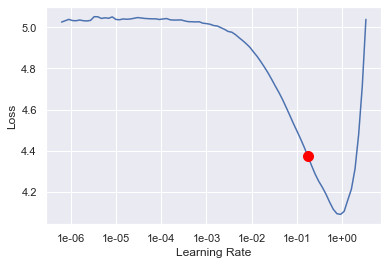

In [32]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [25]:
learn.fit_one_cycle(2, 1.74E-01,callbacks=[SaveModelCallback(learn, name="best_lm")], moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,2.200851,1.866264,0.344418,00:29
1,1.980073,1.809988,0.330166,00:31


Better model found at epoch 0 with valid_loss value: 1.8662643432617188.
Better model found at epoch 1 with valid_loss value: 1.8099883794784546.


In [26]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 1.91E-02
Min loss divided by 10: 3.98E-03


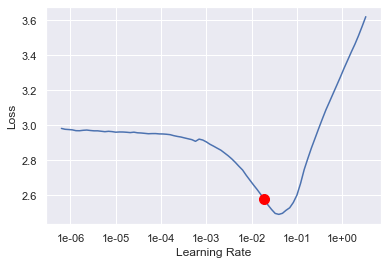

In [36]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [27]:
learn.fit_one_cycle(2, 1.9E-02,callbacks=[SaveModelCallback(learn, name="best_lm")], moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,1.755399,1.651651,0.451306,00:32
1,1.633422,1.554173,0.472684,00:32


Better model found at epoch 0 with valid_loss value: 1.6516510248184204.
Better model found at epoch 1 with valid_loss value: 1.554173469543457.


In [28]:
learn.load('best_lm')
learn.save_encoder('ft_enc')

In [29]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('ft_enc')
pass

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.25E-03
Min loss divided by 10: 6.31E-02


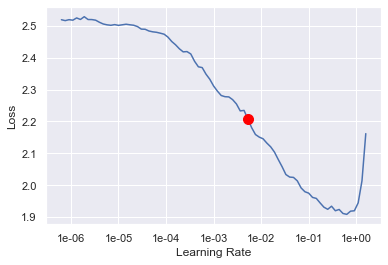

In [30]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [ ]:
# best_clf_lr = learn.recorder.min_grad_lr
# best_clf_lr

In [31]:
learn.fit_one_cycle(1, 5.25E-03)

epoch,train_loss,valid_loss,accuracy,time
0,1.834839,2.247453,0.247031,00:27


In [33]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, 5.25E-03)


epoch,train_loss,valid_loss,accuracy,time


RuntimeError: DataLoader worker (pid 4781) is killed by signal: Unknown signal: 0. 

In [ ]:
learn1.unfreeze()
